In [1]:
import tensorflow as tf
from transformers import TFAutoModelForSequenceClassification, AutoTokenizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"D:\epita class notes\semester - 3\action learnign\project repository\Hate_speech_detection_using_data_augmentation\Hate_speech_detection_using_data_augmentation\data\cleaned_dataset\labeled_data_cleaned.csv")

texts = df['corrected_tweet'].values
labels = df['class'].values

In [3]:
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.3, random_state=42)


In [4]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
num_labels = len(set(labels))

In [5]:
model = TFAutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels)


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [6]:
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=128, return_tensors='tf')
test_encodings = tokenizer(list(X_test), truncation=True, padding=True, max_length=128, return_tensors='tf')

In [7]:
train_input_ids = train_encodings['input_ids']
test_input_ids = test_encodings['input_ids']

In [8]:
batch_size = 16
num_epochs = 3
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)

In [9]:
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


In [10]:
history = model.fit(
    train_input_ids, 
    y_train, 
    validation_data=(test_input_ids, y_test),
    epochs=num_epochs,
    batch_size=batch_size
)

Epoch 1/3


44/44 [==============================] - 150s 3s/step - loss: 0.6710 - accuracy: 0.7357 - val_loss: 0.4979 - val_accuracy: 0.7567
Epoch 2/3
44/44 [==============================] - 113s 3s/step - loss: 0.4589 - accuracy: 0.8386 - val_loss: 0.6921 - val_accuracy: 0.6533
Epoch 3/3
44/44 [==============================] - 112s 3s/step - loss: 0.3758 - accuracy: 0.8829 - val_loss: 0.3759 - val_accuracy: 0.8667


In [11]:
y_pred = np.argmax(model.predict(test_input_ids)[0], axis=1)
y_pred

10/10 [==============================] - 16s 942ms/step


array([1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1], d

In [12]:
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.91      0.94      0.93       227
           2       0.70      0.79      0.74        58

    accuracy                           0.87       300
   macro avg       0.54      0.58      0.56       300
weighted avg       0.83      0.87      0.85       300



D:\miniconda\miniconda\envs\hate_speech\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\miniconda\miniconda\envs\hate_speech\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\miniconda\miniconda\envs\hate_speech\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[  0,   8,   7],
       [  0, 214,  13],
       [  0,  12,  46]], dtype=int64)

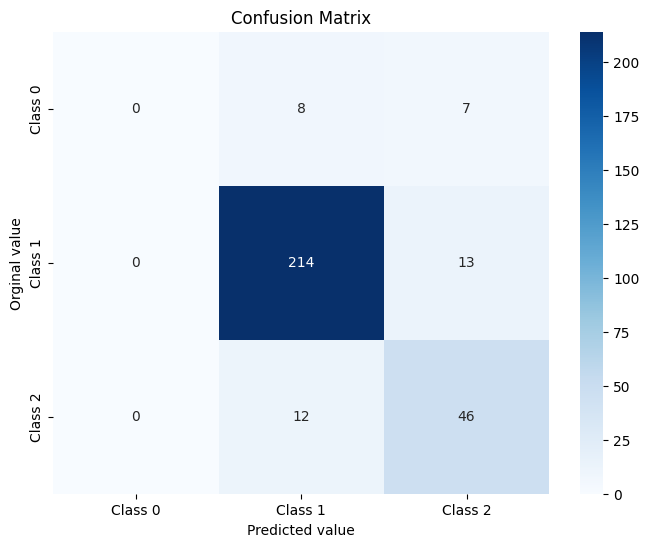

Accuracy: 86.67%


In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1", "Class 2"], yticklabels=["Class 0", "Class 1", "Class 2"])
plt.xlabel('Predicted value')
plt.ylabel('Orginal value')
plt.title('Confusion Matrix')
plt.show()

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

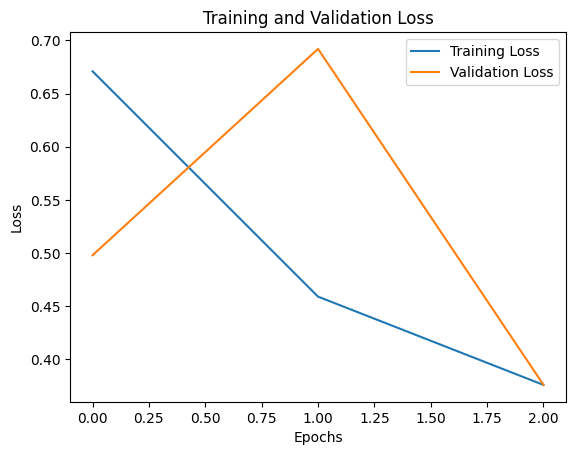

In [15]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()